# Problem Set 3

Author: Kevin Paganini    
Date: 9/19/2022    
Topic: Error Metrics


## Problem 1 part 1- Graphing KNN

![image](problem_1.jpg)

## Problem 1 part 2
I used k = 3 for all cause I saw it to late

![image](problem_2.jpg)

## Problem 2 - Confusion matrics, recall, precision and f1-score

![image](problem_3.jpg)

## Problem 3

In [80]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math

haberman_file_path = os.path.join('data', 'haberman-1.csv')
diabetes_file_path = os.path.join('data', 'diabetes.csv')
peak_lfc_file_path = os.path.join('data', 'peak-lfc-1.csv')
ex1_file_path = os.path.join('data', 'ex1_results-1.csv')


### Loading data

In [81]:
haberman = pd.read_csv(haberman_file_path, header=None)
haberman.columns = ['Feature 1', 'Feature 2', 'Feature 3', 'Target']
haberman['Target'] = haberman['Target'] - 1
haberman.head()

,Feature 1,Feature 2,Feature 3,Target
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0


1 = patient died     
0 = patient survived

### Train - Test Split


In [82]:
# could have done sklearn
from sklearn.model_selection import train_test_split


# Pass in a ratio to split the data
# Pass in data 
# Assumed last column is target variable
# Since this is not graded I will use a for loop 
def train_test_split(data, ratio):
    train_set = []
    test_set = []
    
    for x in range(data.shape[0]):
        num = np.random.rand()
        
        if num <= ratio:
            train_set.append(data[x])
        else:
            test_set.append(data[x])
    test_set = np.array(test_set)
    train_set = np.array(train_set)
    print(test_set.shape)
    print(train_set.shape)
    return train_set[:,:-1], test_set[:,:-1], train_set[:,-1], test_set[:,-1]



### Observations from each class

In [83]:
train_X, test_X, train_y, test_y = train_test_split(np.array(haberman[['Feature 1', 'Feature 2', 'Feature 3', 'Target']]), 0.7)

train_set_pd = pd.DataFrame(train_y)
test_set_pd = pd.DataFrame(test_y)

train_set_pd.columns = ['Target']
test_set_pd.columns = ['Target']

total_vc = haberman['Target'].value_counts()
print(f'Total Dataset value counts:\n{total_vc}')
print(f'Ratio of survival: {total_vc[0]/ (total_vc[0] + total_vc[1])}')
train_vc = train_set_pd['Target'].value_counts()
print(f'Train Dataset value counts:\n{train_vc}')
print(f'Ratio of survival: {train_vc[0]/ (train_vc[0] + train_vc[1])}')
test_vc = test_set_pd['Target'].value_counts()
print(f'Test Dataset value counts:\n{test_vc}')
print(f'Ratio of survival: {test_vc[0]/ (test_vc[0] + test_vc[1])}')

print('\n\n Overall quite close to actual values of the dataset. Good representation')


(82, 4)
(224, 4)
Total Dataset value counts:
0    225
1     81
Name: Target, dtype: int64
Ratio of survival: 0.7352941176470589
Train Dataset value counts:
0    163
1     61
Name: Target, dtype: int64
Ratio of survival: 0.7276785714285714
Test Dataset value counts:
0    62
1    20
Name: Target, dtype: int64
Ratio of survival: 0.7560975609756098


 Overall quite close to actual values of the dataset. Good representation


### Stratified data split

In [84]:
def stratified_train_test_split(data, ratio, targets):
    train_set = []
    test_set = []
    
    data_classes = []
    for target in targets:
        d = data[data[:,-1]==target]
        data_classes.append(d)
    
    for d in data_classes:
        for x in range(d.shape[0]):
            num = np.random.rand()
            
            if num <= ratio:
                train_set.append(d[x])
            else:
                test_set.append(d[x])
    test_set = np.array(test_set)
    train_set = np.array(train_set)
    
    return train_set[:,:-1], test_set[:,:-1], train_set[:,-1], test_set[:,-1]

In [85]:
train_X, test_X, train_y, test_y = stratified_train_test_split(np.array(haberman[['Feature 1', 'Feature 2', 'Feature 3', 'Target']]), 0.7, [0, 1])

train_set_pd = pd.DataFrame(train_y)
test_set_pd = pd.DataFrame(test_y)

train_set_pd.columns = ['Target']
test_set_pd.columns = ['Target']

total_vc = haberman['Target'].value_counts()
print(f'Total Dataset value counts:\n{total_vc}')
print(f'Ratio of survival: {total_vc[0]/ (total_vc[0] + total_vc[1])}')
train_vc = train_set_pd['Target'].value_counts()
print(f'Train Dataset value counts:\n{train_vc}')
print(f'Ratio of survival: {train_vc[0] / (train_vc[0] + train_vc[1])}')
test_vc = test_set_pd['Target'].value_counts()
print(f'Test Dataset value counts:\n{test_vc}')
print(f'Ratio of survival: {test_vc[0]/ (test_vc[0] + test_vc[1])}')
print(test_vc[0])

print('\n\n Overall quite close to actual values of the dataset. Good representation')


Total Dataset value counts:
0    225
1     81
Name: Target, dtype: int64
Ratio of survival: 0.7352941176470589
Train Dataset value counts:
0    160
1     52
Name: Target, dtype: int64
Ratio of survival: 0.7547169811320755
Test Dataset value counts:
0    65
1    29
Name: Target, dtype: int64
Ratio of survival: 0.6914893617021277
65


 Overall quite close to actual values of the dataset. Good representation


Stratification is important so that an equal amount of each target is in the training and testing set. Lets say you have 5 samples of target_one and 100 of target_two. With the first method it is very likely that taarget_one may not be in the testing set. With the second method this is avoided.


## Problem 4 - The Bias-Variance Tradeoff

- Bias refers to the error that is introduced due to wrong assumptions such as approximating
    a complicated pattern in data with a simple model. A high-bias model is a model that fails
    to capture the structure in data and results in underfitting the training data. High bias or
    underfitting is usually caused by a model that is too simple or when there is a few features.
-
- Variance refers to the amount by which the model would change if we used a different training
    data set. A high-variance model is a model that does not generalize well to predict new
    data but performs well on training data, which is also know as overfitting. High variance
    or overfitting is usually caused by a model that is too complex for the data

### Problem 4 part 1
1. As the number of neighbors increases, the complexity of the classifier lowers. Its predictions curve sampled across      space becomes much more linear and less jumpy. The decision boundary will become a lot simpler and smoother the more neighb ors there are. 

Less neighbors --> high variance, low bias    
More neighbors --> low variance, high bias


### Problem 4 part 2

In [86]:
diabetes = pd.read_csv(diabetes_file_path)
diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [87]:
X = np.array(diabetes.iloc[:,:-1])
y = np.array(diabetes.iloc[:,-1])
print(X.shape)
print(y.shape)

(768, 8)
(768,)


### Problem 4 part 3

In [88]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

### Problem 4 part 4
I am just going to use accuracy as a metric even though that's not really the best metric

In [89]:
from sklearn.model_selection import cross_validate

scores = cross_validate(knn, X, y, cv=5, scoring='accuracy', return_train_score=True)
train_score = np.mean(scores['train_score'])
test_score = np.mean(scores['test_score'])
print(f'Training accuracy score mean: {train_score}')
print(f'Testing accuracy score mean: {test_score}')

Training accuracy score mean: 0.7975297264373296
Testing accuracy score mean: 0.723979288685171


### Problem 4 part 5

Interestingly enough I did something similar with the advertising data set from lab 2


In [90]:

training_scores = []
test_scores = []
for k in range(1, 51):
    ret = cross_validate(KNeighborsClassifier(n_neighbors=k), X, y, cv=5, scoring='accuracy', return_train_score=True)
    training_scores.append(np.mean(ret['train_score']))
    test_scores.append(np.mean(ret['test_score']))
    


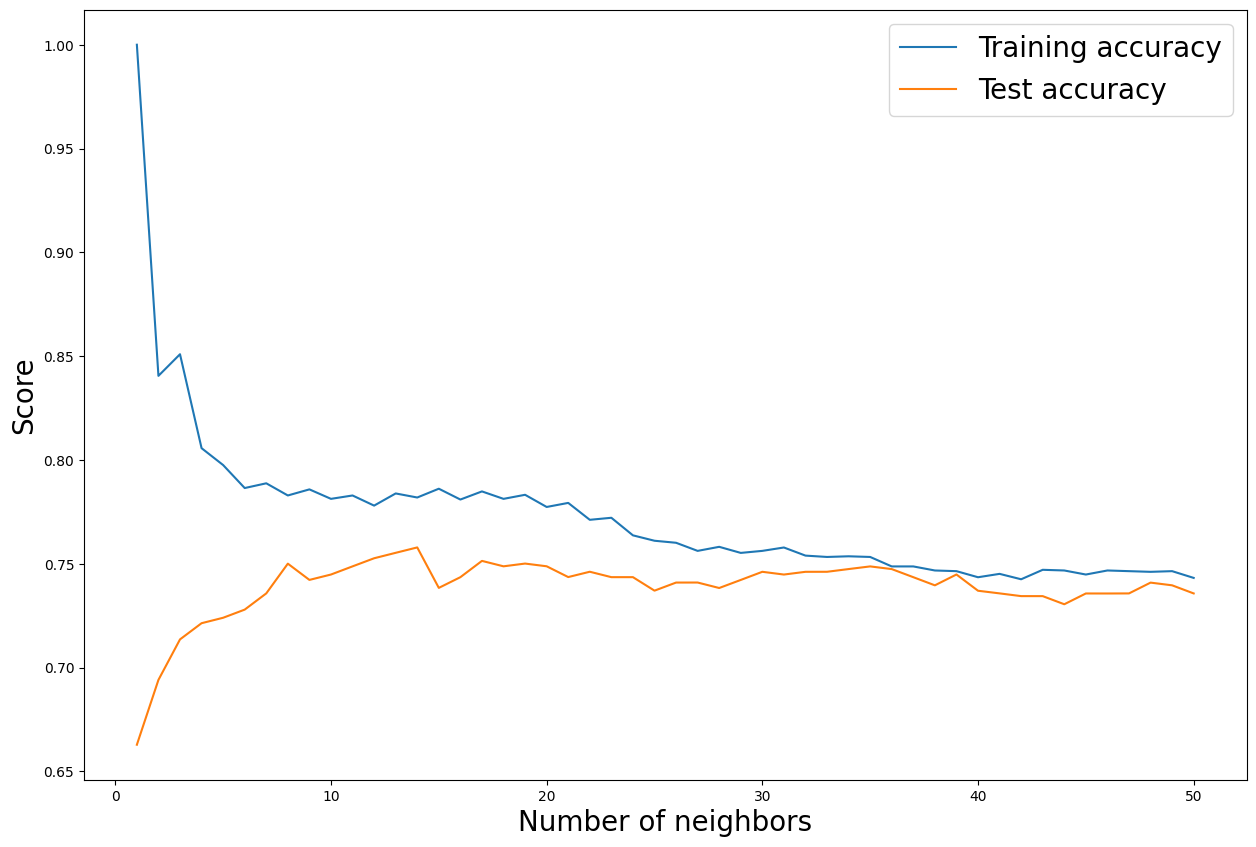

In [91]:
fig, ax = plt.subplots(figsize=(15, 10))
x_mesh = np.arange(1, 51)

ax.plot(x_mesh, training_scores, label='Training accuracy')

ax.plot(x_mesh, test_scores, label='Test accuracy')

ax.set_xlabel('Number of neighbors', fontsize=20)
ax.set_ylabel('Score', fontsize=20)

ax.legend(loc='best', fontsize=20)


    


High bias (underfitting) when k > 42 (The values start to decrease, however the model stays relatively consistent from 10-50), so it really isnt that biased      
High variance (overfitting) when k = 1

Best model: Probably when the two curves are crossing

In [92]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error


boston = load_boston()


X = boston['data']
y = boston['target']
print(X.shape)
print(y.shape)


(506, 13)
(506,)


c:\CS3400_IPYNB\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


In [93]:
training_scores = []
test_scores = []
for k in range(1, 401):
    ret = cross_validate(KNeighborsRegressor(n_neighbors=k), X, y, cv=5, 
                        scoring=make_scorer(mean_squared_error), return_train_score=True)
    training_scores.append(np.mean(ret['train_score']))
    test_scores.append(np.mean(ret['test_score']))

(400,)


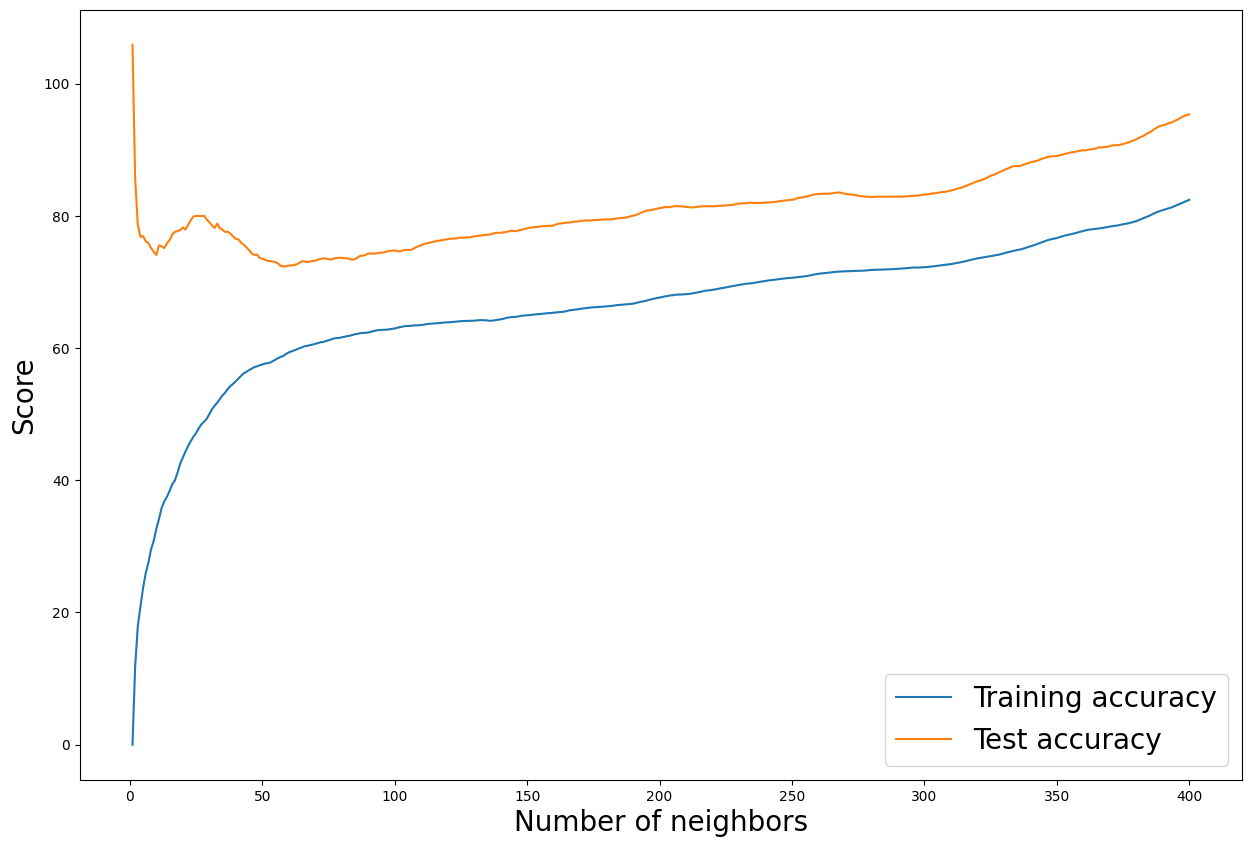

In [94]:
fig, ax = plt.subplots(figsize=(15, 10))


x_mesh_2 = np.arange(1, 401)
print(x_mesh_2.shape)
ax.plot(x_mesh_2, training_scores, label='Training accuracy')

ax.plot(x_mesh_2, test_scores, label='Test accuracy')

ax.set_xlabel('Number of neighbors', fontsize=20)
ax.set_ylabel('Score', fontsize=20)

ax.legend(loc='best', fontsize=20)


### Comments

I would take these results with a grain of salt because the data has not been scaled

## Problem 5 part 1 and 2 and 3

![image](dim.jpg)


$$
l / total
$$
$$
(l / total)^2
$$
where l is how long the subspace we are searching is. 
$$
(l / total)^3
$$

The number of dimensions is the power on the subspace we are searching in.

n = number of dimensions
l = subspace (ratio) 

$$
(l/ total)^n
$$

## Problem 5 part 4


Text(0.5, 1.0, 'Num dimensions vs. subspace searched')

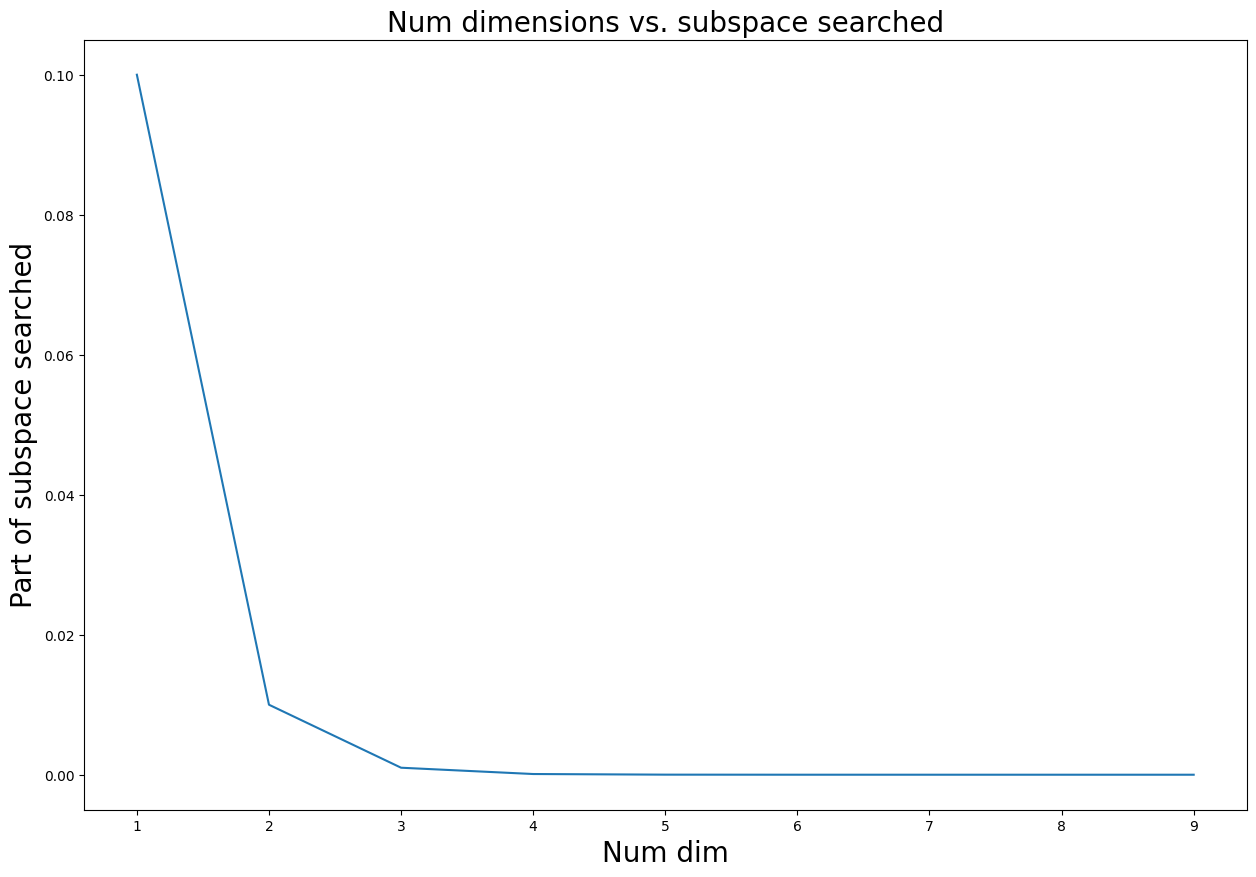

In [95]:
# In this case l is already length of subset / entire subset
subspace_val = lambda x : math.pow(0.1, x)
X = np.arange(1, 10, step=1)
y = []
for x in range(1, 10):
    y.append(subspace_val(x))
    
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(X, y)
ax.set_xlabel('Num dim', fontsize=20)
ax.set_ylabel('Part of subspace searched', fontsize=20)
ax.set_title('Num dimensions vs. subspace searched', fontsize=20)


### Problem 5 part 4 continued

As the number of dimensions gets bigger the meaning of each feature gets smaller and smaller. When trying to predict a new observation, the higher the number of dimensions the further away observations will probably be.


Example: If you were on a line you would only have to move forward or backwards to run into a previous observation.   
In two dimensions, you have the options forward, backward, left and right. In 3D you add up and down. This continues on the higher dimensions get. 
Eventually it becomes like trying to find a needle in a haystack and instead of your haystack being 3-D it can be 1000-dimensional, which makes it nearly impossible.

#### How many observations (N expressed in terms of p) do we need for k = 10 and ℓ = 0.1?

$$
N = k^p
$$
where p is the number of dimensions and k = 10






### Problem 5 part 5
If you have a space that is one dimensional and its dimension length is ten than you would only need 0.1 * len(dim) to get 10%, so 1.

In two dimensions if the sides are also 10 than the entire space is 100 square units and you would need 10 square units to cover 10% of the search space. So each side would have to be 
$$
\sqrt{10}
$$
which is around 3.17. Which when you look at the original side length of 10 is 31% and not 10% of it. 

In 3 dimensions with dimension length ten you have a space that is 1000 cubic units. TO reach ten percent of the search space you would need to cover 100 cubic units.So in each dimension you would have to have dimension length of cube root 100

$$
\sqrt[3]{100}
$$

Text(0, 0.5, 'Length of each dim that needs to be searched')

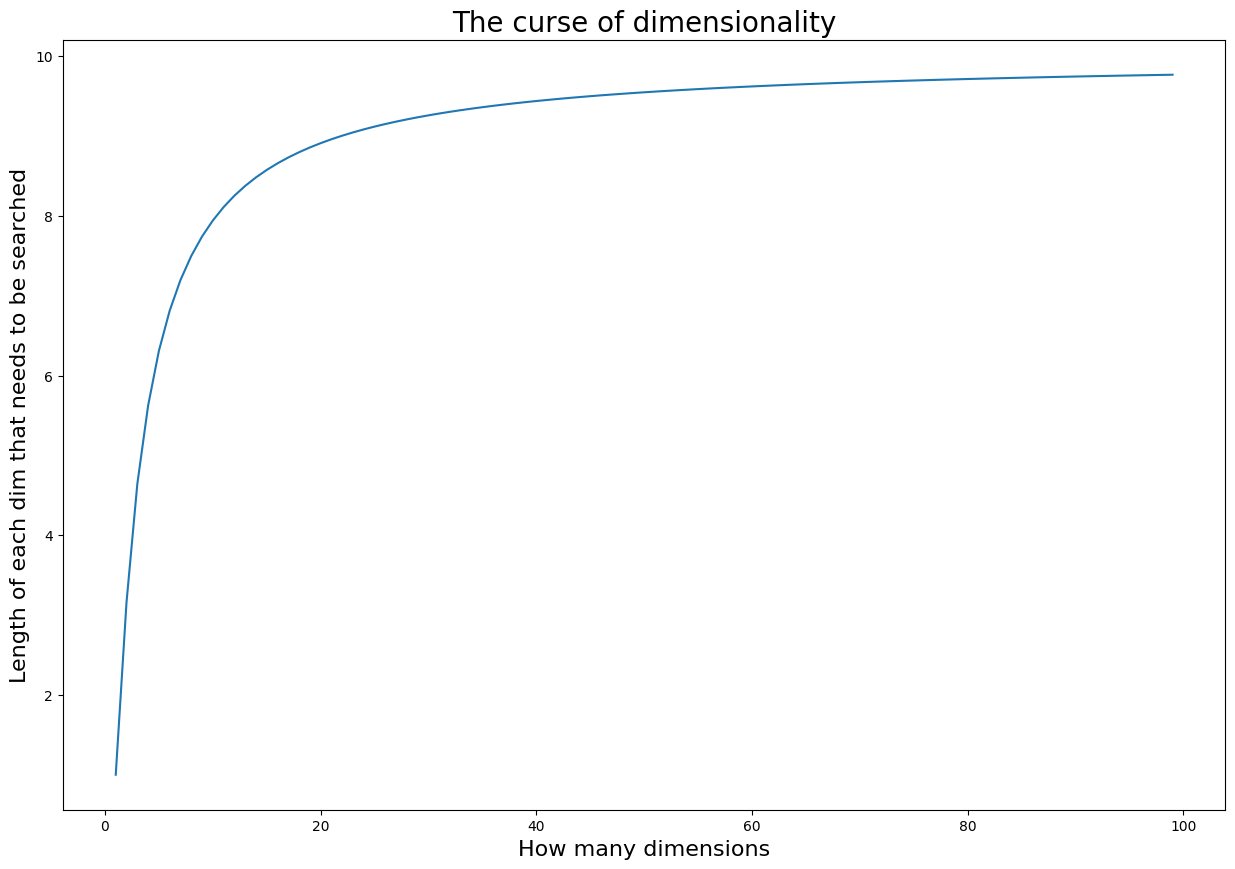

In [96]:
fig, ax = plt.subplots(figsize=(15, 10))

dim_length = 10
subspace_search = 0.1
x_mesh = np.arange(1, 100, step=1)
y_vals = []
for i in range(1,100):
    ret = subspace_search * math.pow(dim_length, i)
    y_vals.append(math.pow(ret, (1/ i)))
    
ax.plot(x_mesh, y_vals)

ax.set_title('The curse of dimensionality', fontsize=20)
ax.set_xlabel('How many dimensions', fontsize=16)
ax.set_ylabel('Length of each dim that needs to be searched', fontsize=16)



### Problem 6 part a

In [97]:
ex1 = pd.read_csv(ex1_file_path, header=None)
ex1.head()


,0,1
0,0.99348,1
1,0.87742,0
2,0.91694,0
3,0.99419,1
4,0.99394,1


In [98]:
predicted = np.array(ex1.iloc[:,0])
actual = np.array(ex1.iloc[:,1])
full = np.vstack((predicted, actual))



### Problem 6 part b

In [99]:
thresholds = [0.25, 0.5, 0.75]


    

 
data_dif_thresholds = []
for thresh in thresholds:
    data_dif_thresholds.append((predicted > thresh).astype(int))
    



In [100]:
from sklearn.metrics import confusion_matrix

confusion_matrices = []
for d in data_dif_thresholds:
    
    # Constructing the confusion matrix
    confusion_matrices.append(confusion_matrix(d, actual))


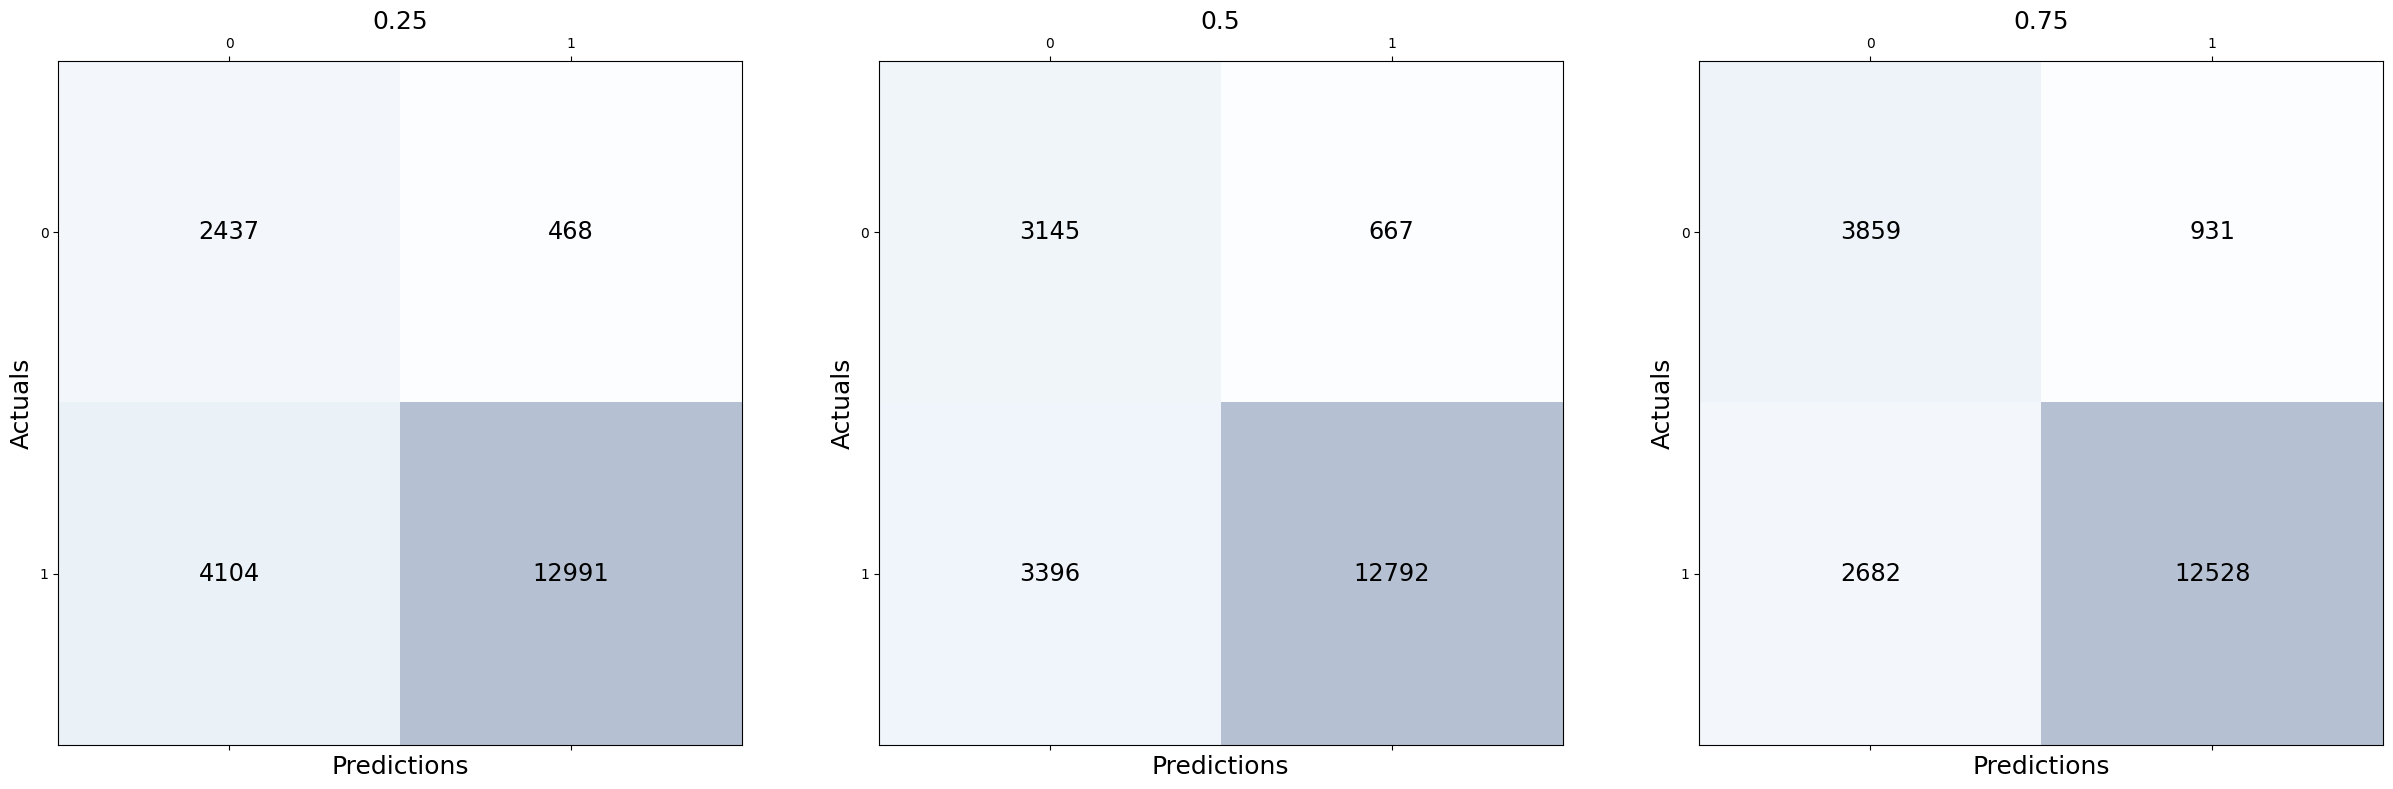

In [101]:
fig, ax = plt.subplots(figsize=(30, 20), ncols=3, nrows=1)
row = 0
for col in range(3):
   
        
    ax[col].matshow(confusion_matrices[col], cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusion_matrices[col].shape[0]):
        for j in range(confusion_matrices[col].shape[1]):
            ax[col].text(x=j, y=i,s=confusion_matrices[col][i, j], va='center', ha='center', size='xx-large')
    
    ax[col].set_xlabel('Predictions', fontsize=18)
    ax[col].set_ylabel('Actuals', fontsize=18)
    ax[col].set_title(f'{thresholds[col]}', fontsize=18)
plt.show()

In [102]:
for i in range(3):
    print(confusion_matrices[i])
    print()

[[ 2437   468]
 [ 4104 12991]]

[[ 3145   667]
 [ 3396 12792]]

[[ 3859   931]
 [ 2682 12528]]



### Problem 6 part d

True positive rate:


$$
TP / (TP + FN)
$$
0.25 => 75%   
0.5 => 79%    
0.75 => 82%


False positive rate:

$$
FP / (FP + TN)
$$
0.25 => 16%       
0.5 => 17%  
0.75 => 19%

Clearly there is a tradeoff here. When recall gets better, miss rate gets worse.

0.75 gives the best TPR and 0.25 gives the best FPR. 
0.25 gives the worst TPR and 0.75 gives the worst FPR.








### Problem 6 part e

In [103]:

x_sorted_asc = full[full[:, 0].argsort()]
data_dif_thresholds = []
# masking with various thresholds
for thresh in thresholds:
    data_dif_thresholds.append((x_sorted_asc[0] > thresh).astype(int))
   
# creating confusion matrices 
confusion_matrices = []
for d in data_dif_thresholds:
    confusion_matrices.append(confusion_matrix(d, actual))

True positive rate for threshold 0.25: 0.7599298040362679
False positive rate for threshold 0.25: 0.16110154905335627
True positive rate for threshold 0.5: 0.7902149740548554
False positive rate for threshold 0.5: 0.17497376705141657
True positive rate for threshold 0.75: 0.8236686390532545
False positive rate for threshold 0.75: 0.19436325678496869


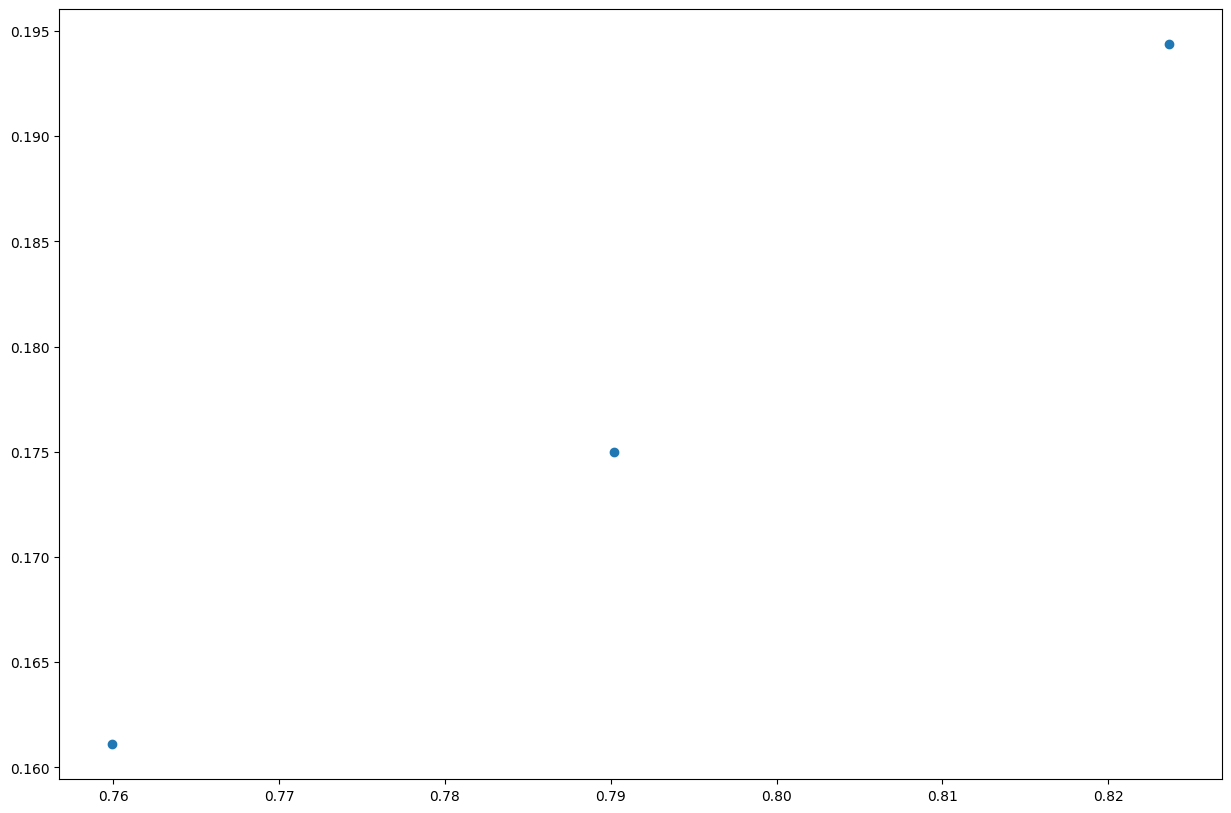

In [104]:

# calculating tpr (recall) and fpr (miss rate)
tpr_rates = []
fpr_rates = []
i = 0
for c in confusion_matrices:
    tpr = c[1,1] / (c[1,1] + c[1,0])
    fpr = c[0,1] / (c[0,1] + c[0,0])
    tpr_rates.append(tpr)
    fpr_rates.append(fpr)
    print(f'True positive rate for threshold {thresholds[i]}: {tpr}')
    print(f'False positive rate for threshold {thresholds[i]}: {fpr}')
    
    i += 1
    


fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(tpr_rates, fpr_rates)
    